In [17]:
# IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score 

1) UNDERSTANDING THE DATA

In [18]:
#Loading the dataset and viewing the first 5 rows.
df=pd.read_csv("dataset.csv")
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [19]:
#Viewing the shape of the data
df.shape

(1781, 21)

In [20]:
#viewing columns in the dataset
df.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [21]:
#checking for null values in the dataset
df.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

The 'CONTENT_LENGTH', 'SERVER',and 'DNS_QUERY_TIMES' have some null values so we use the interpolate method to fill those null spaces.

2) CLEANING AND PRE-PROCESSING THE DATA


In [23]:
#Filling the null values

df['CONTENT_LENGTH']=df['CONTENT_LENGTH'].interpolate()
df['DNS_QUERY_TIMES']=df['DNS_QUERY_TIMES'].interpolate()
df['SERVER']=df['SERVER'].interpolate()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             1781 non-null   float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In order to use the data and perform data manipulations, the data must be read and stored in uniform structure.
It is seen that some of the features are in int and float datatypes. 
Since these features are nominal, they need to be converted into object data types.

In [24]:
for data in [df]:
    data['URL_LENGTH'] = data['URL_LENGTH'].astype(str)
    data['CONTENT_LENGTH'] = data['CONTENT_LENGTH'].astype(str)
    data['TCP_CONVERSATION_EXCHANGE'] = data['TCP_CONVERSATION_EXCHANGE'].astype(str)
    data['DIST_REMOTE_TCP_PORT'] = data['DIST_REMOTE_TCP_PORT'].astype(str)
    data['REMOTE_IPS'] = data['REMOTE_IPS'].astype(str)
    data['APP_BYTES'] = data['APP_BYTES'].astype(str)
    data['SOURCE_APP_PACKETS'] = data['SOURCE_APP_PACKETS'].astype(str)
    data['REMOTE_APP_PACKETS'] = data['REMOTE_APP_PACKETS'].astype(str)
    data['SOURCE_APP_BYTES'] = data['SOURCE_APP_BYTES'].astype(str)
    data['REMOTE_APP_BYTES'] = data['REMOTE_APP_BYTES'].astype(str)
    data['APP_PACKETS'] = data['APP_PACKETS'].astype(str)
    data['DNS_QUERY_TIMES'] = data['DNS_QUERY_TIMES'].astype(str)
    

To use the independent variables (or features) to predict the dependent variable (or outcome), the variables need to be split into X and y, where X represents all the features input into the model and y represents the outcome result from the model.

In [25]:
dependentVar = 'Type'
X = df.loc[:, df.columns != dependentVar]
y = df[dependentVar].values

 Machine learning algorithms require that input and output variables are represented as numbers. Since this data set includes categorical features, they must be **encoded** to numbers before they can be used to fit and evaluate a model.

In [26]:
X = pd.get_dummies(X)

**Feature Scaling:** Naive Bayes algorithm calculates the distance between two points using the Euclidean distance. 
If one of the features has a broad range of values, the distance will be dominated by this feature. 
**Standardization and normalization** are techniques that are used on the range of independent variables to allow each feature to proportionately contribute to the final distance.

In [27]:
sc = StandardScaler()
X= sc.fit_transform(X)

3) MODELLING

I) NAIVE BAYES ALGORITHM


To assess the predictive performance of the model, it is important to have an unbiased evaluation. This can be accomplished by splitting the dataset before using it. The data is randomly split into a training set and a testing set, where 80% of the data is kept aside for the training data and the remaining 20% of the data is kept aside for the testing data.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 32)

To train the model on training data so it can accurately predict the outcome.

In [29]:
nbModel = GaussianNB()
nbModel.fit(X_train, y_train)

GaussianNB()

To obtain model prediction on testing data to evaluate the model’s accuracy and efficiency;

In [30]:
y_pred = nbModel.predict(X_test)

In [31]:
clf_cv_score = cross_val_score(nbModel, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(clf_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Naive Bayes: ", clf_cv_score.mean())

=== Confusion Matrix ===
[[308   6]
 [ 13  30]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       314
           1       0.83      0.70      0.76        43

    accuracy                           0.95       357
   macro avg       0.90      0.84      0.86       357
weighted avg       0.94      0.95      0.94       357



=== All AUC Scores ===
[0.64953677 0.87703963 0.81847319 0.78613054 0.74038462 0.64306527
 0.51728844 0.91097968 0.7062481  0.97452229]


=== Mean AUC Score ===
Mean AUC Score - Naive Bayes:  0.7623668528923305


In [32]:
accuracy = accuracy_score(y_test,y_pred)*100
print(accuracy)

94.67787114845937


Creating an ROC for Naive Bayes Model

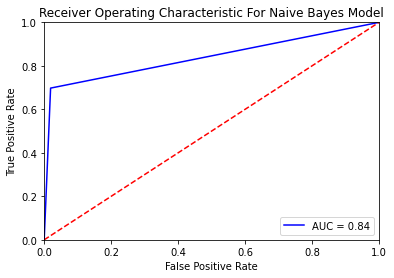

In [35]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the Naive Bayes classification
probs = nbModel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic For Naive Bayes Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
